<a href="https://colab.research.google.com/github/samgdotson/2019-dotson-winter/blob/master/solar_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving 2018_dni.csv to 2018_dni.csv
Saving 2017_dni.csv to 2017_dni.csv
Saving 2016_dni.csv to 2016_dni.csv
Saving 2015_dni.csv to 2015_dni.csv
Saving 2014_dni.csv to 2014_dni.csv
Saving 2013_dni.csv to 2013_dni.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def dateparse(x):
    return pd.datetime.strptime(x, '%Y %m %d %H %M')

# Read in the data and create a time index

In [0]:
df_2013 = pd.read_csv("2013_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2013['time'] = pd.to_datetime(df_2013[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2013.index = pd.to_datetime(df_2013.time)

In [0]:
df_2014 = pd.read_csv("2014_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2014['time'] = pd.to_datetime(df_2014[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2014.index = pd.to_datetime(df_2014.time)

In [0]:
df_2015 = pd.read_csv("2015_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2015['time'] = pd.to_datetime(df_2015[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2015.index = pd.to_datetime(df_2015.time)

In [0]:
df_2016 = pd.read_csv("2016_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2016['time'] = pd.to_datetime(df_2016[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2016.index = pd.to_datetime(df_2016.time)

In [0]:
df_2017 = pd.read_csv("2017_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2017['time'] = pd.to_datetime(df_2017[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2017.index = pd.to_datetime(df_2017.time)

In [0]:
df_2018 = pd.read_csv("2018_dni.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2018['time'] = pd.to_datetime(df_2018[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2018.index = pd.to_datetime(df_2018.time)

# Let's analyze each year, separately. 

In [0]:
# define useful tools

# time converters from datetime to minutes
year_minutes = lambda x: (x.year-2013)*525600 + (x.month-1)*43800  + (x.day-1)*1440 + (x.hour)*60 + x.minute
month_minutes = lambda x: (x.day-1)*1440 + (x.hour)*60 + x.minute
year_hours = lambda x: (x.year-2013)*8760 + (x.month-1)*730 + (x.day-1)*24 + (x.hour)

## Step 1: Resample the dataframes to get hourly resolution



In [0]:
# Step 1: resample the dataframes to get hourly resolution. 
df_2013_hourly = df_2013.resample('H').mean()
df_2014_hourly = df_2014.resample('H').mean()
df_2015_hourly = df_2015.resample('H').mean()
df_2016_hourly = df_2016.resample('H').mean()
df_2017_hourly = df_2017.resample('H').mean()
df_2018_hourly = df_2018.resample('H').mean()

## Step 2: Define and calculate the declination for each day


The formula for declination is

$\delta = 23.44*\sin(\frac{\pi}{180}\frac{360}{365}(N+284))$

The factor of $\pi/180$ in the sine argument is necessary because numpy 
defaults to radians, rather than degrees.

In [0]:
# define the calculation for declination (delta). 
delta = lambda x: 23.44*np.sin(np.pi/180*(360/365)*(x+284))

In [0]:
# the deltas are still not quite correct, so I'm going to force it to be correct. 
# This will not be the prettiest of solutions. 
dec = {'delta':[]}

for day in range(1,366):
  hourly_dec = []
  for hour in range(24):
    hourly_dec.append(delta(day))
  # print(len(hourly_dec))
  dec['delta'].extend(hourly_dec)

dec = pd.Series(dec)
print(len(dec['delta']))

#special one for 2016
dec16 = {'delta':[]}

for day in range(1,367):
  hourly_dec = []
  for hour in range(24):
    hourly_dec.append(delta(day))
  # print(len(hourly_dec))
  dec16['delta'].extend(hourly_dec)

dec16 = pd.Series(dec16)
print(len(dec16['delta']))

8760
8784


In [0]:
df_2013_hourly['delta'] = dec['delta']
df_2014_hourly['delta'] = dec['delta']
df_2015_hourly['delta'] = dec['delta'] 
df_2016_hourly['delta'] = dec16['delta']
df_2017_hourly['delta'] = dec['delta']
df_2018_hourly['delta'] = dec['delta']

In [0]:
df_2013_hourly

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta
time,,,,,,,,,
2013-01-01 00:00:00,2013.0,1.0,1.0,0.0,15.0,0.0,0.0,-5.0,-23.001824
2013-01-01 01:00:00,2013.0,1.0,1.0,1.0,15.0,0.0,0.0,-5.0,-23.001824
2013-01-01 02:00:00,2013.0,1.0,1.0,2.0,15.0,0.0,0.0,-6.0,-23.001824
2013-01-01 03:00:00,2013.0,1.0,1.0,3.0,15.0,0.0,0.0,-7.0,-23.001824
2013-01-01 04:00:00,2013.0,1.0,1.0,4.0,15.0,0.0,0.0,-7.0,-23.001824
...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,2013.0,12.0,31.0,19.0,15.0,0.0,0.0,-1.0,-23.076066
2013-12-31 20:00:00,2013.0,12.0,31.0,20.0,15.0,0.0,0.0,-1.0,-23.076066
2013-12-31 21:00:00,2013.0,12.0,31.0,21.0,15.0,0.0,0.0,-2.0,-23.076066


In [0]:
pd.set_option('display.max_rows', 365)

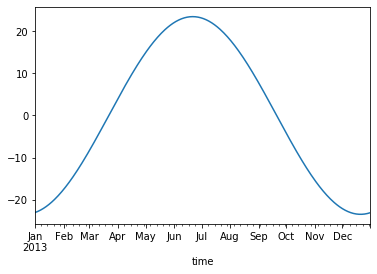

In [0]:
# verify that delta is correct
angle = df_2013_hourly['delta'].resample('D').mean()
angle.plot()

## Step 3: Calculate the hourly Total Irradiance ($G_T$) and Power (P)

This is the model for power output of a solar panel \
$P = G_T\tau_{pv}\eta_{ref}A[1-\gamma(T-25)]$

where $G_T$ is given by \
$G_T = DNI*\cos(\beta+\delta-lat)+DHI*\frac{180-\beta}{180}$

- $\tau$ is the "transmittance of the PV module's outside layer"
- $\gamma$ is the "temperature coefficient
- A is the area covered by the solar panels
- $\eta$ is the PV module efficiency
- $\beta$ is the tilt of the solar panels
- T is the temperature (in $^\circ$C)

These formulas were obtained from Garcia et. al. Which can be found at this link
https://inldigitallibrary.inl.gov/sites/sti/sti/6531825.pdf 

The values for $\gamma$, $\tau$ and $\eta$ are not known for the UIUC solar farm, thus values from Garcia et. al are also used. Later, we will normalize the data set and rescale it by the rated power to fix this problem. 


In [0]:
# approximate coordinates of champaign-urbana
lat = 40.13
lon = -88.22

# these values are from Garcia et. al
# Currently, the maximum power output is too high. 
eta = 0.15
tau = 0.9
gam = 0.0045 # changed this from 0.0045 to 0.009 to see if I get a more accurate max value.

# these values are from the iSEE facts sheet regarding UIUC's solar farm
beta = 20
A = 84174.61*0.6 # [m^2] or 20.8 acres, but a coverage factor of 60%

# define the formulae
G = lambda dni, delt, dhi: dni*np.cos((np.pi/180)*(beta + delt - lat)) + dhi*(180-beta)/180
P = lambda Gt, T: Gt*tau*eta*A*(1-gam*(T-25))

### 2013

In [0]:
sol_irr = {'G':[]}
for i in range(len(df_2013_hourly)):
  dni = df_2013_hourly.iloc[i]['DNI']
  dhi = df_2013_hourly.iloc[i]['DHI']
  delt = df_2013_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2013_hourly['G'] = sol_irr['G']

In [0]:
power = {'Power':[]}
for i in range(len(df_2013_hourly)):
  gt = df_2013_hourly.iloc[i]['G']
  T = df_2013_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2013_hourly['power'] = power['Power']

### 2014


In [0]:
sol_irr = {'G':[]}
for i in range(len(df_2014_hourly)):
  dni = df_2014_hourly.iloc[i]['DNI']
  dhi = df_2014_hourly.iloc[i]['DHI']
  delt = df_2014_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2014_hourly['G'] = sol_irr['G']

In [0]:
power = {'Power':[]}
for i in range(len(df_2014_hourly)):
  gt = df_2014_hourly.iloc[i]['G']
  T = df_2014_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2014_hourly['power'] = power['Power']

### 2015


In [0]:
sol_irr = {'G':[]}
for i in range(len(df_2015_hourly)):
  dni = df_2015_hourly.iloc[i]['DNI']
  dhi = df_2015_hourly.iloc[i]['DHI']
  delt = df_2015_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2015_hourly['G'] = sol_irr['G']

In [0]:
power = {'Power':[]}
for i in range(len(df_2015_hourly)):
  gt = df_2015_hourly.iloc[i]['G']
  T = df_2015_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2015_hourly['power'] = power['Power']

### 2016

In [0]:
sol_irr = {'G':[]}
for i in range(len(df_2016_hourly)):
  dni = df_2016_hourly.iloc[i]['DNI']
  dhi = df_2016_hourly.iloc[i]['DHI']
  delt = df_2016_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2016_hourly['G'] = sol_irr['G']

In [0]:
power = {'Power':[]}
for i in range(len(df_2016_hourly)):
  gt = df_2016_hourly.iloc[i]['G']
  T = df_2016_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2016_hourly['power'] = power['Power']

### 2017

In [0]:
sol_irr = {'G':[]}
for i in range(len(df_2017_hourly)):
  dni = df_2017_hourly.iloc[i]['DNI']
  dhi = df_2017_hourly.iloc[i]['DHI']
  delt = df_2017_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2017_hourly['G'] = sol_irr['G']

In [0]:
power = {'Power':[]}
for i in range(len(df_2017_hourly)):
  gt = df_2017_hourly.iloc[i]['G']
  T = df_2017_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2017_hourly['power'] = power['Power']

### 2018

In [0]:
sol_irr = {'G':[]}
for i in range(len(df_2018_hourly)):
  dni = df_2018_hourly.iloc[i]['DNI']
  dhi = df_2018_hourly.iloc[i]['DHI']
  delt = df_2018_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2018_hourly['G'] = sol_irr['G']

In [0]:
power = {'Power':[]}
for i in range(len(df_2018_hourly)):
  gt = df_2018_hourly.iloc[i]['G']
  T = df_2018_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2018_hourly['power'] = power['Power']

## Step 4: Normalize the Power Column

I am doing this because there is an issue with the maximum power produced by these solar panels (it is too high). I believe is makes sense to normalize the data and then scale it by the rated power output of the solar farm. 

The rated power output of the solar farm is: 4.68 MWe


In [0]:
max(df_2013_hourly['power'])

rated_power = 4680000 # Watts

In [0]:
# import required libraries to normalize
from sklearn import preprocessing

In [0]:
def normalize(df, col):
  """
  This function accepts a dataframe and a column label
  and returns a normalized version of the column as a 
  pandas series.

  Parameters:
  -----------
  df : Pandas dataframe
    The dataframe containing the column you'd like to normalize.
  col : string
    The label of the column you wish to normalize

  Returns: 
  --------
  normalized_col : Pandas series
    The normalized column of data.
  """
  column = df[[col]].values.astype(float)
  min_max_scaler = preprocessing.MinMaxScaler()
  column_scaled = min_max_scaler.fit_transform(column)
  
  normalized_col = pd.Series({col+'_norm':column_scaled})

  return normalized_col

### 2013


In [0]:
norm_2013 = normalize(df_2013_hourly, 'power')
df_2013_hourly['power_norm'] = norm_2013['power_norm']*rated_power

### 2014

In [0]:
norm_2014 = normalize(df_2014_hourly, 'power')
df_2014_hourly['power_norm'] = norm_2014['power_norm']*rated_power

### 2015


In [0]:
norm_2015 = normalize(df_2015_hourly, 'power')
df_2015_hourly['power_norm'] = norm_2015['power_norm']*rated_power

### 2016

In [0]:
norm_2016 = normalize(df_2016_hourly, 'power')
df_2016_hourly['power_norm'] = norm_2016['power_norm']*rated_power

### 2017


In [0]:
norm_2017 = normalize(df_2017_hourly, 'power')
df_2017_hourly['power_norm'] = norm_2017['power_norm']*rated_power

### 2018

In [0]:
norm_2018 = normalize(df_2018_hourly, 'power')
df_2018_hourly['power_norm'] = norm_2018['power_norm']*rated_power

## Step 5: Plot the Data

4679999.999999999

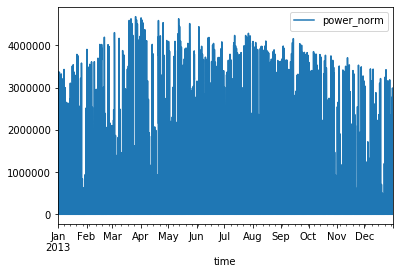

In [0]:
df_2013_hourly.plot(y='power_norm')
max(df_2013_hourly['power_norm'])

# Combine all the yearly data into a single dataframe

In [0]:
# combine all frames
frames = [df_2013_hourly,df_2014_hourly,df_2015_hourly,df_2016_hourly,df_2017_hourly,df_2018_hourly]

all_data = pd.concat(frames)

In [0]:
all_data

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta,G,power,power_norm
time,,,,,,,,,,,,
2013-01-01 00:00:00,2013.0,1.0,1.0,0.0,15.0,0.0,0.0,-5.00,-23.001824,0.0,0.0,0.0
2013-01-01 01:00:00,2013.0,1.0,1.0,1.0,15.0,0.0,0.0,-5.00,-23.001824,0.0,0.0,0.0
2013-01-01 02:00:00,2013.0,1.0,1.0,2.0,15.0,0.0,0.0,-6.00,-23.001824,0.0,0.0,0.0
2013-01-01 03:00:00,2013.0,1.0,1.0,3.0,15.0,0.0,0.0,-7.00,-23.001824,0.0,0.0,0.0
2013-01-01 04:00:00,2013.0,1.0,1.0,4.0,15.0,0.0,0.0,-7.00,-23.001824,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2018.0,12.0,31.0,19.0,15.0,0.0,0.0,-14.80,-23.076066,0.0,0.0,0.0
2018-12-31 20:00:00,2018.0,12.0,31.0,20.0,15.0,0.0,0.0,-15.95,-23.076066,0.0,0.0,0.0
2018-12-31 21:00:00,2018.0,12.0,31.0,21.0,15.0,0.0,0.0,-17.45,-23.076066,0.0,0.0,0.0


### Create a new column called 'time.'

This will be a running total of all the hours in this dataset.

In [0]:
hours = []
for t in range(len(all_data)):
  hours.append(t)

all_data['time'] = hours

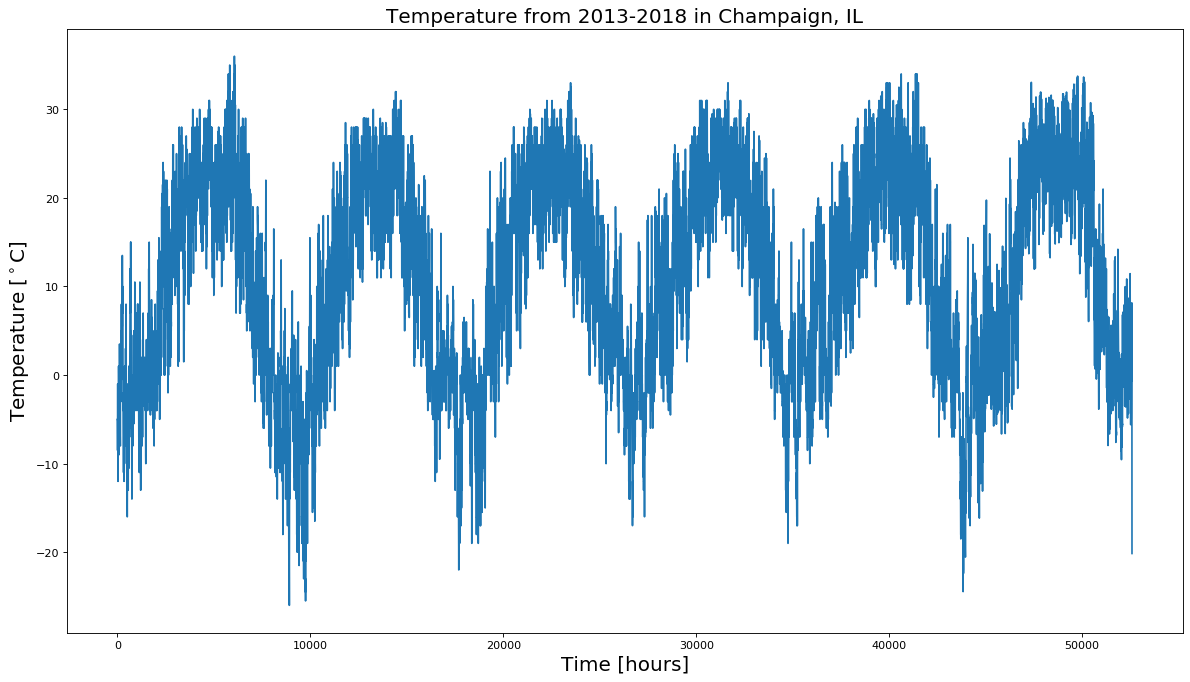

In [0]:
fig=plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(all_data['time'], all_data['Temperature'])
plt.xlabel("Time [hours]", fontsize=18)
plt.ylabel("Temperature [$^\circ$C]",fontsize=18)
plt.title("Temperature from 2013-2018 in Champaign, IL",fontsize=18)
plt.show()

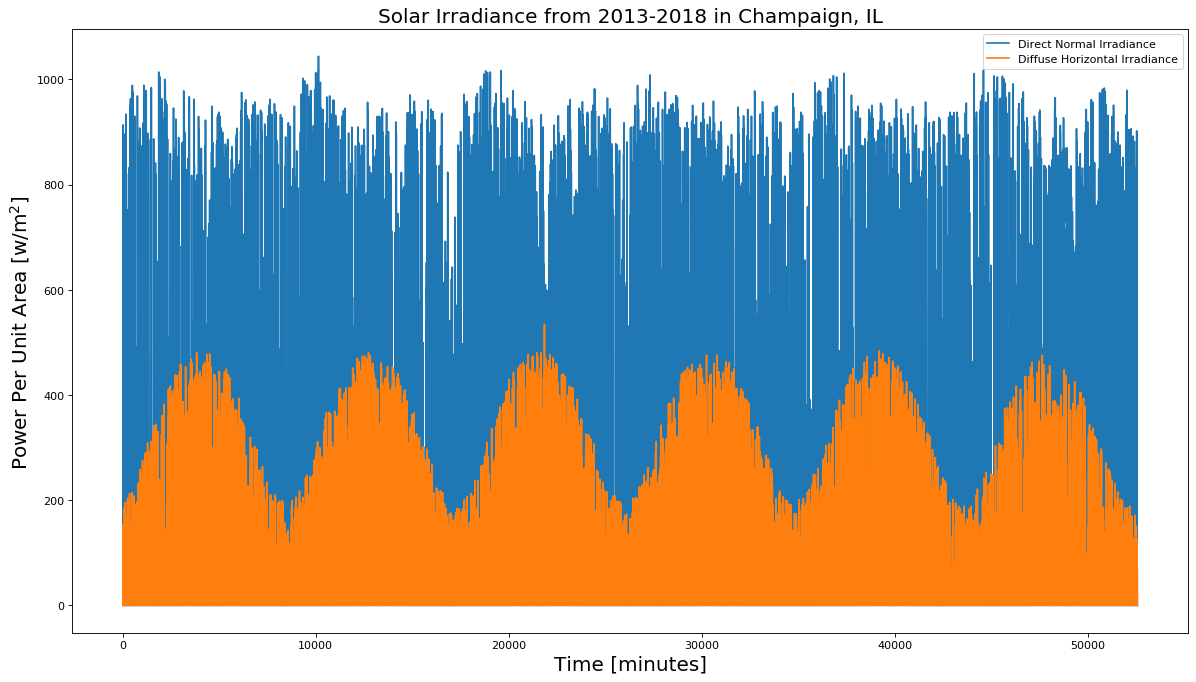

In [0]:
fig=plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(all_data['time'], all_data['DNI'], label='Direct Normal Irradiance')
plt.plot(all_data['time'], all_data['DHI'], label='Diffuse Horizontal Irradiance')
plt.xlabel("Time [minutes]", fontsize=18)
plt.ylabel("Power Per Unit Area [w/m$^2$] ",fontsize=18)
plt.title("Solar Irradiance from 2013-2018 in Champaign, IL",fontsize=18)
plt.legend()
plt.show()

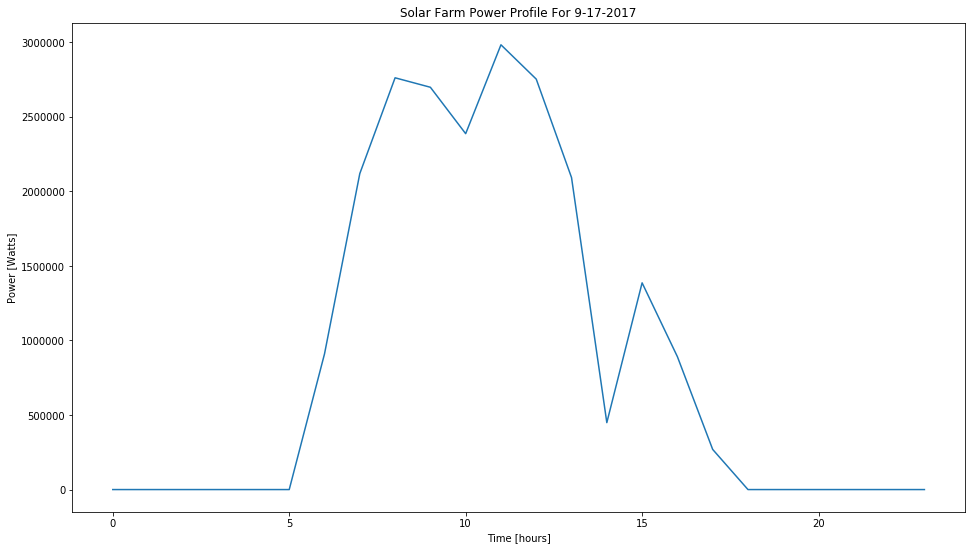

In [0]:
import random as rd 

# list all possible days, months, years
# years is only listed for those three because anything before that wouldn't 
# have solar farm data.
years = [2016,2017,2018]
months = list(all_data['Month'].unique())
days = list(all_data['Day'].unique())

# choose a random combination of values
day = rd.choice(days)
month = rd.choice(months)
year = rd.choice(years)

# down select the appropriate day
# there is probably an easier way to do this with masking... 
year_grouped = all_data.groupby(all_data['Year'])
random_year = year_grouped.get_group(year)
month_grouped = random_year.groupby(random_year['Month'])
random_month = month_grouped.get_group(month)
days_grouped = random_month.groupby(random_month['Day'])
random_day = days_grouped.get_group(day)

# print('The date is {}/{}/{}'.format(month,day,year))
date = str(int(month))+'-'+str(int(day))+'-'+str(int(year))
fig = plt.figure(figsize=(16,9), facecolor='w', edgecolor='k')
plt.plot(random_day['Hour'], random_day['power_norm'])
plt.title('Solar Farm Power Profile For '+date)
plt.xlabel('Time [hours]')
plt.ylabel('Power [Watts]')
plt.show()

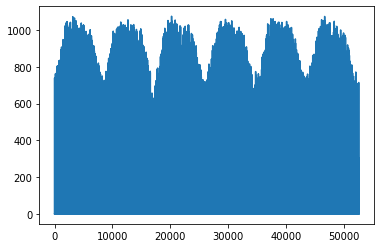

In [0]:
plt.plot(all_data['time'],all_data['G'])
plt.show()

dict_keys([2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0])
time
2013-01-01 00:00:00   -23.001824
2013-01-01 01:00:00   -23.001824
2013-01-01 02:00:00   -23.001824
2013-01-01 03:00:00   -23.001824
2013-01-01 04:00:00   -23.001824
                         ...    
2013-12-31 19:00:00   -23.076066
2013-12-31 20:00:00   -23.076066
2013-12-31 21:00:00   -23.076066
2013-12-31 22:00:00   -23.076066
2013-12-31 23:00:00   -23.076066
Freq: H, Name: delta, Length: 8760, dtype: float64


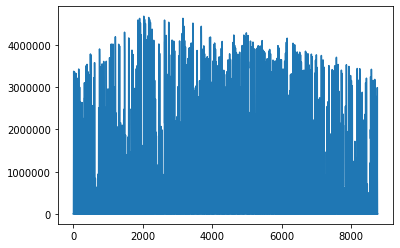

time
2014-01-01 00:00:00   -23.001824
2014-01-01 01:00:00   -23.001824
2014-01-01 02:00:00   -23.001824
2014-01-01 03:00:00   -23.001824
2014-01-01 04:00:00   -23.001824
                         ...    
2014-12-31 19:00:00   -23.076066
2014-12-31 20:00:00   -23.076066
2014-12-31 21:00:00   -23.076066
2014-12-31 22:00:00   -23.076066
2014-12-31 23:00:00   -23.076066
Freq: H, Name: delta, Length: 8760, dtype: float64


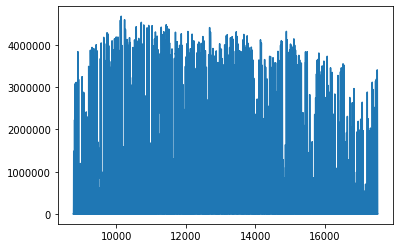

time
2015-01-01 00:00:00   -23.001824
2015-01-01 01:00:00   -23.001824
2015-01-01 02:00:00   -23.001824
2015-01-01 03:00:00   -23.001824
2015-01-01 04:00:00   -23.001824
                         ...    
2015-12-31 19:00:00   -23.076066
2015-12-31 20:00:00   -23.076066
2015-12-31 21:00:00   -23.076066
2015-12-31 22:00:00   -23.076066
2015-12-31 23:00:00   -23.076066
Freq: H, Name: delta, Length: 8760, dtype: float64


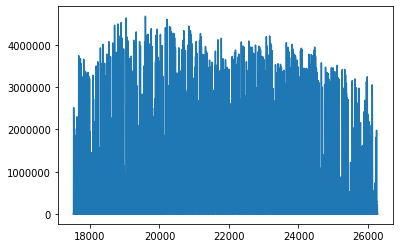

time
2016-01-01 00:00:00   -23.001824
2016-01-01 01:00:00   -23.001824
2016-01-01 02:00:00   -23.001824
2016-01-01 03:00:00   -23.001824
2016-01-01 04:00:00   -23.001824
                         ...    
2016-12-31 19:00:00   -23.001824
2016-12-31 20:00:00   -23.001824
2016-12-31 21:00:00   -23.001824
2016-12-31 22:00:00   -23.001824
2016-12-31 23:00:00   -23.001824
Name: delta, Length: 8760, dtype: float64


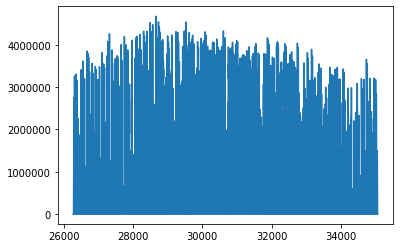

time
2017-01-01 00:00:00   -23.001824
2017-01-01 01:00:00   -23.001824
2017-01-01 02:00:00   -23.001824
2017-01-01 03:00:00   -23.001824
2017-01-01 04:00:00   -23.001824
                         ...    
2017-12-31 19:00:00   -23.076066
2017-12-31 20:00:00   -23.076066
2017-12-31 21:00:00   -23.076066
2017-12-31 22:00:00   -23.076066
2017-12-31 23:00:00   -23.076066
Freq: H, Name: delta, Length: 8760, dtype: float64


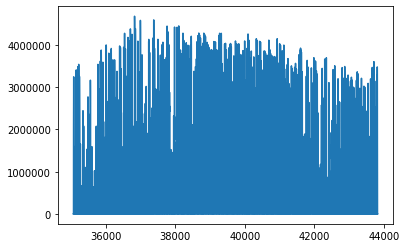

time
2018-01-01 00:00:00   -23.001824
2018-01-01 01:00:00   -23.001824
2018-01-01 02:00:00   -23.001824
2018-01-01 03:00:00   -23.001824
2018-01-01 04:00:00   -23.001824
                         ...    
2018-12-31 19:00:00   -23.076066
2018-12-31 20:00:00   -23.076066
2018-12-31 21:00:00   -23.076066
2018-12-31 22:00:00   -23.076066
2018-12-31 23:00:00   -23.076066
Freq: H, Name: delta, Length: 8760, dtype: float64


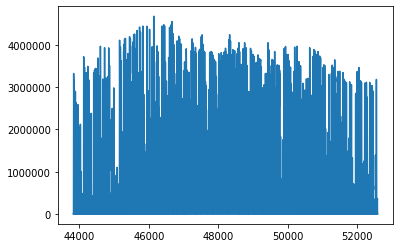

In [0]:
grouped = all_data.groupby('Year')
years = grouped.groups.keys()
print(years)
for year in years:
  y = grouped.get_group(year)
  print(y['delta'])
  plt.plot(y['time'], y['power_norm'])
  plt.show()

# Create a new dataset file from the complete dataframe


In [0]:
all_data.to_csv("solar_model_data.csv")

# Quantify the difference between the actual and the calculated data


In [0]:
from google.colab import files
new_uploads = files.upload()

Saving solardata_2016.csv to solardata_2016.csv


In [0]:
farm_df16 = pd.read_csv("solardata_2016.csv")
farm_df16.index = pd.to_datetime(farm_df16.time)

In [0]:
farm_df16

,time,measured,inverted
time,,,
2016-01-01 00:00:00,2016-01-01 00:00:00,-1.33,0.0
2016-01-01 00:15:00,2016-01-01 00:15:00,-1.25,0.0
2016-01-01 00:30:00,2016-01-01 00:30:00,-3.20,0.0
2016-01-01 00:45:00,2016-01-01 00:45:00,-1.13,0.0
2016-01-01 01:00:00,2016-01-01 01:00:00,-1.14,0.0
...,...,...,...
2016-12-31 22:45:00,2016-12-31 22:45:00,-17.70,0.0
2016-12-31 23:00:00,2016-12-31 23:00:00,-17.80,0.0
2016-12-31 23:15:00,2016-12-31 23:15:00,-16.80,0.0


In [0]:
farm_df16 = farm_df16.resample('H').mean()
farm_df16['inverted'] = farm_df16['inverted']*1000

In [0]:
hours = []
for t in range(len(farm_df16)):
  hours.append(t)

farm_df16['time'] = hours
df_2016_hourly['time'] = hours

In [0]:
print(farm_df16.head())
print(df_2016_hourly.head())

                     measured  inverted  time
time                                         
2016-01-01 00:00:00  -1.72750       0.0     0
2016-01-01 01:00:00  -0.71300       0.0     1
2016-01-01 02:00:00  -0.42800       0.0     2
2016-01-01 03:00:00   0.38250       0.0     3
2016-01-01 04:00:00  -2.27775       0.0     4
                       Year  Month  Day  Hour  ...    G  power  power_norm  time
time                                           ...                              
2016-01-01 00:00:00  2016.0    1.0  1.0   0.0  ...  0.0    0.0         0.0     0
2016-01-01 01:00:00  2016.0    1.0  1.0   1.0  ...  0.0    0.0         0.0     1
2016-01-01 02:00:00  2016.0    1.0  1.0   2.0  ...  0.0    0.0         0.0     2
2016-01-01 03:00:00  2016.0    1.0  1.0   3.0  ...  0.0    0.0         0.0     3
2016-01-01 04:00:00  2016.0    1.0  1.0   4.0  ...  0.0    0.0         0.0     4

[5 rows x 13 columns]


In [0]:
calculated = (df_2016_hourly['power_norm'].values)
actual = (farm_df16['inverted'].values)

In [0]:
difference = actual-calculated

In [0]:
difference

array([0., 0., 0., ..., 0., 0., 0.])

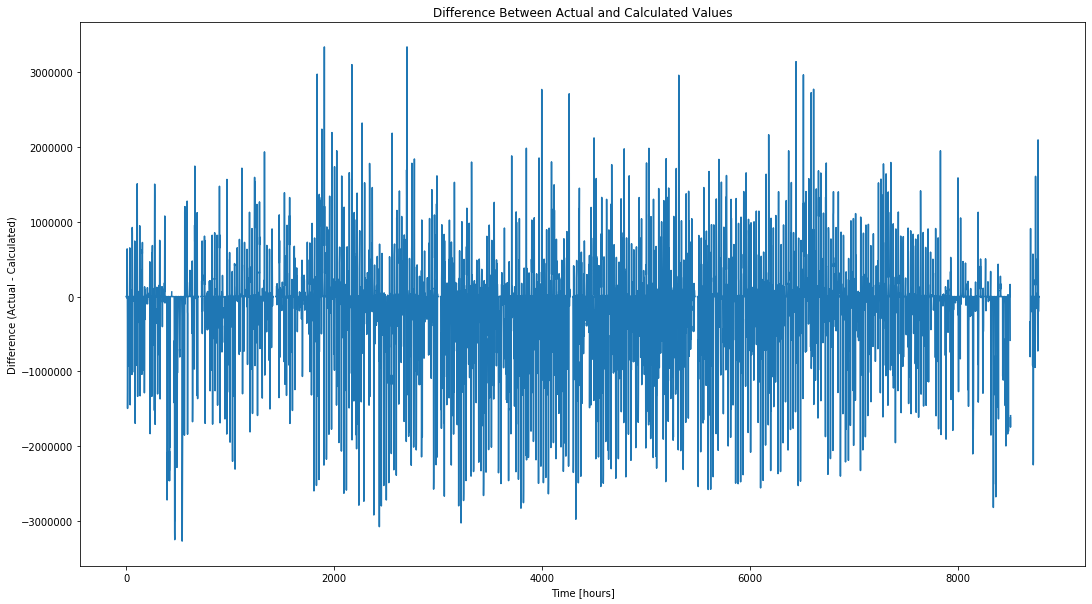

In [0]:
x = np.arange(0,len(difference),1)
fig = plt.figure(figsize=(18,10), edgecolor='k', facecolor='w')
plt.plot(x,difference)
plt.title("Difference Between Actual and Calculated Values")
plt.xlabel('Time [hours]')
plt.ylabel('Difference (Actual - Calculated)')
plt.show()

In [0]:
max(farm_df16['inverted'])

4723.0

In [0]:
actual_grouped = farm_df16.groupby(farm_df16.index.month)
calc_grouped = df_2016_hourly.groupby(df_2016_hourly.index.month)

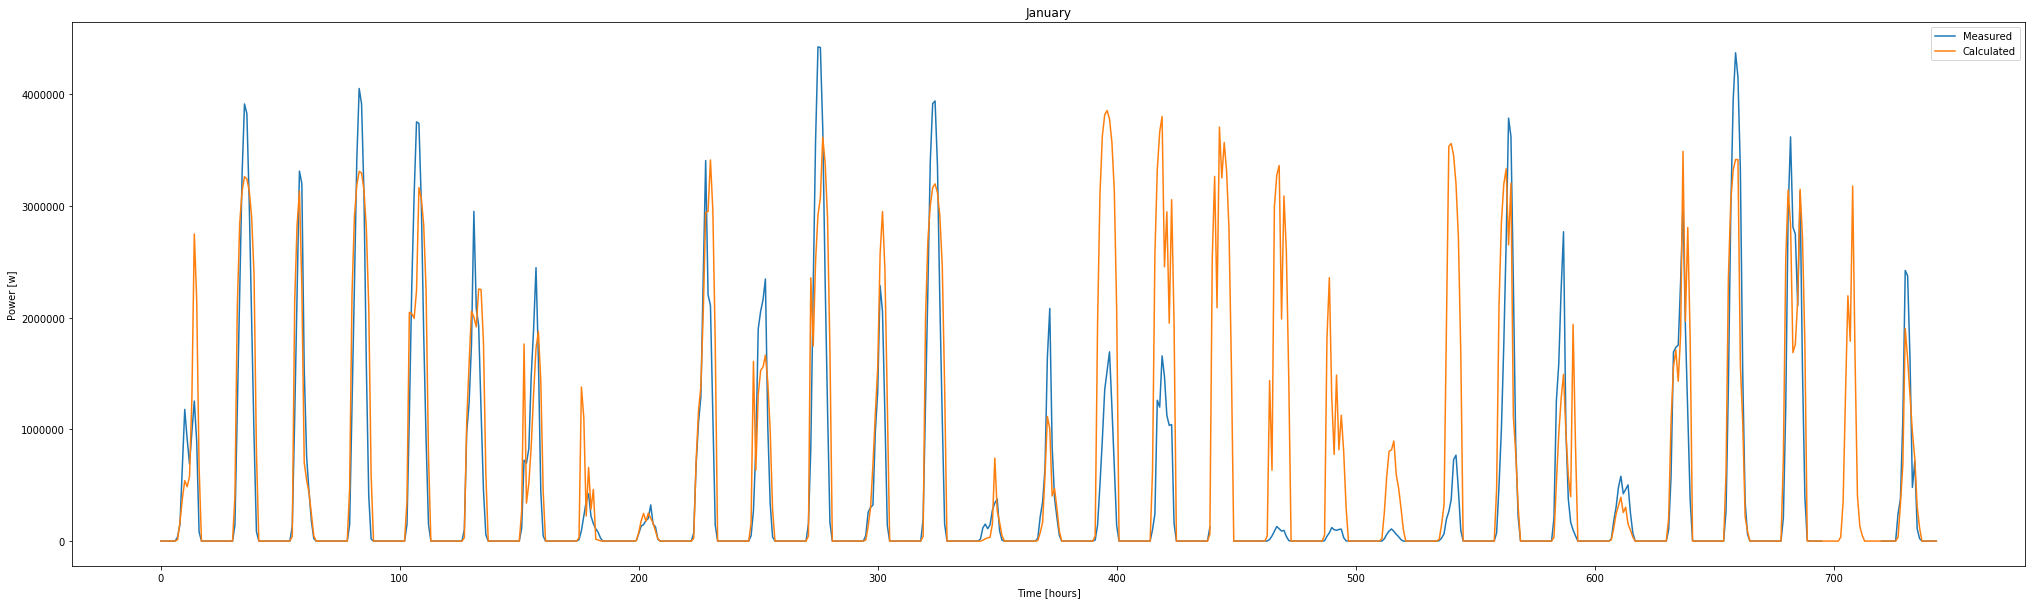

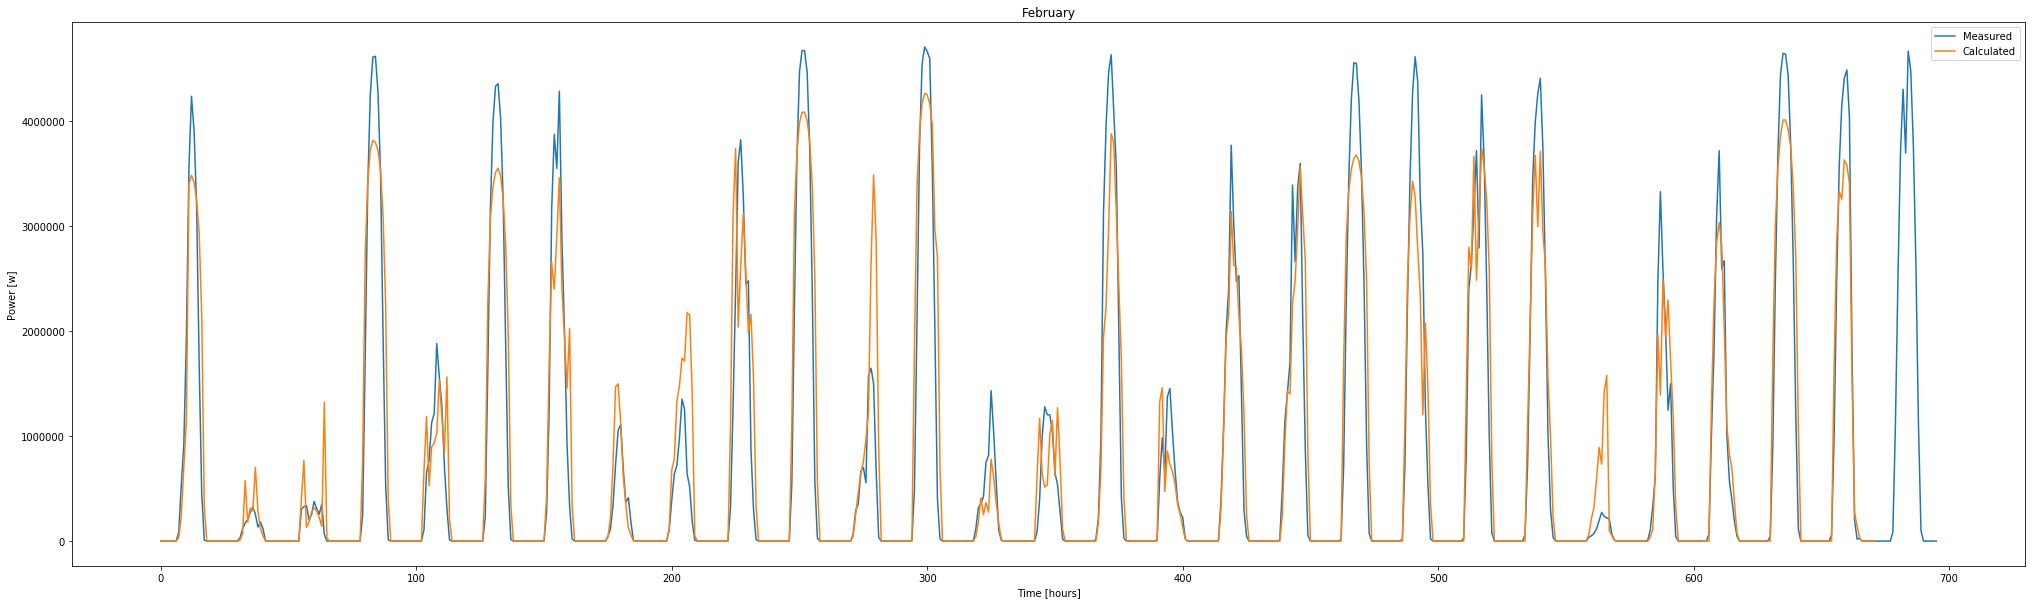

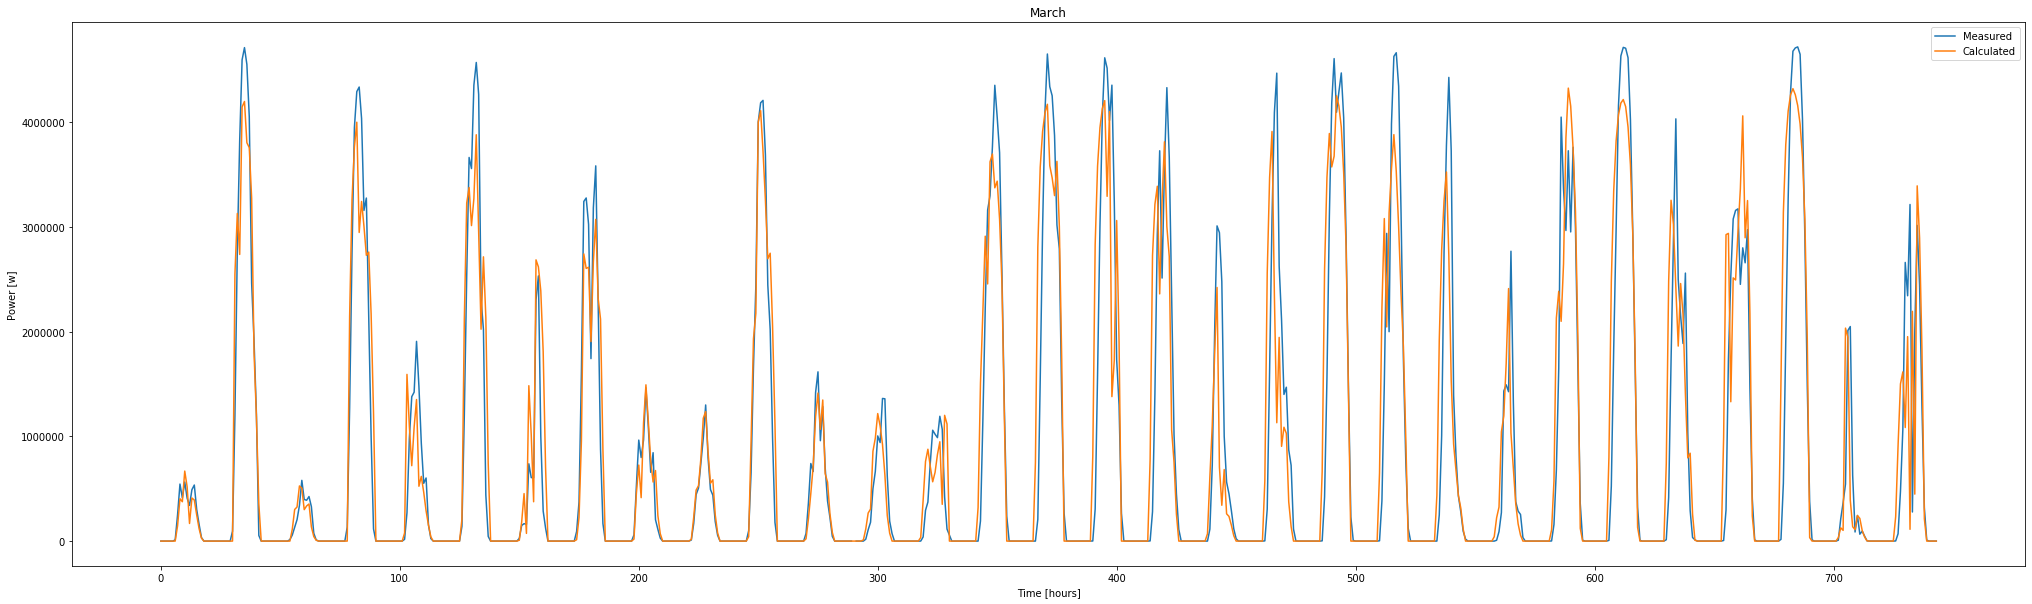

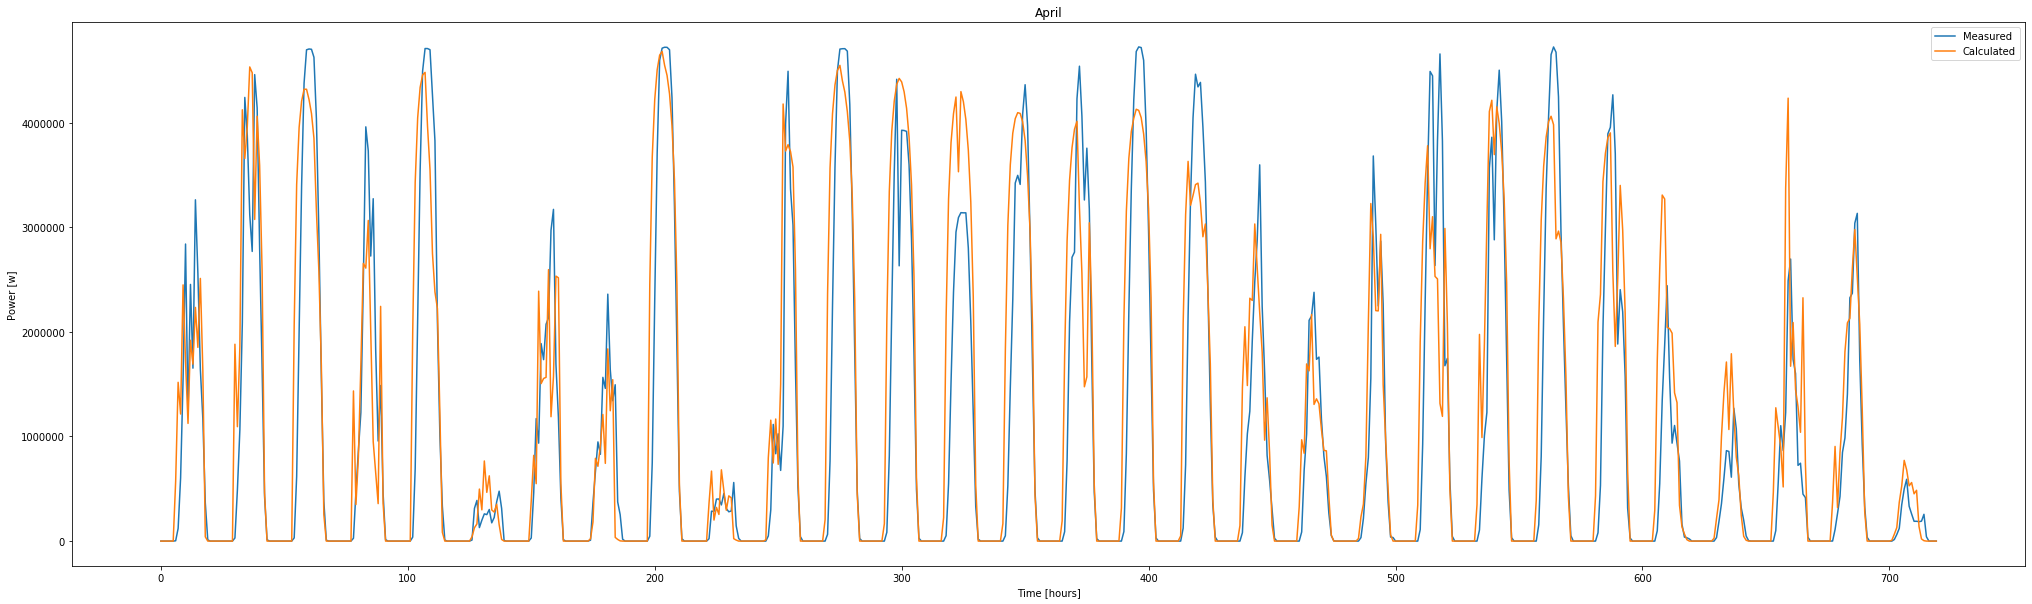

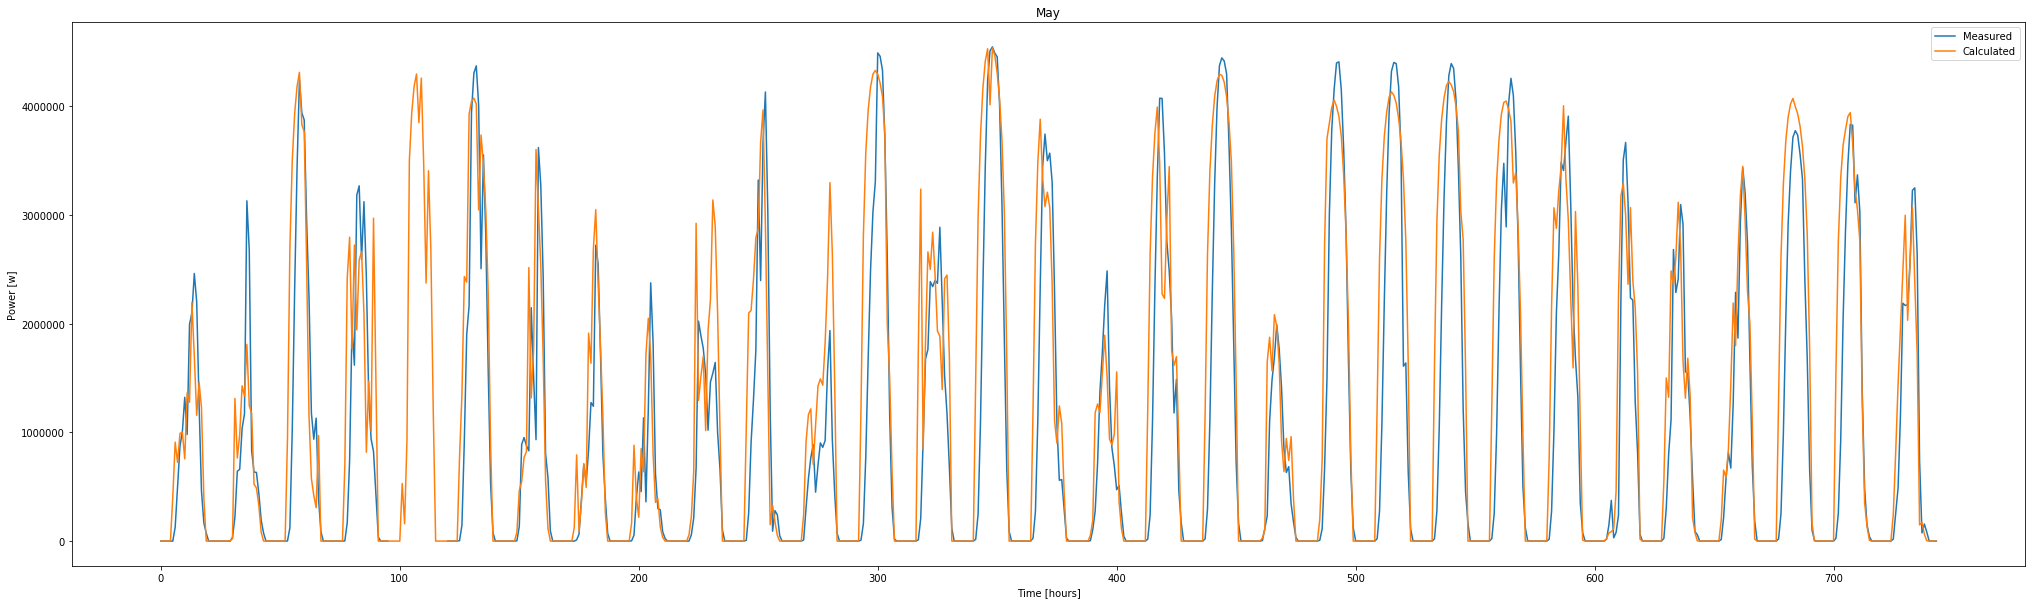

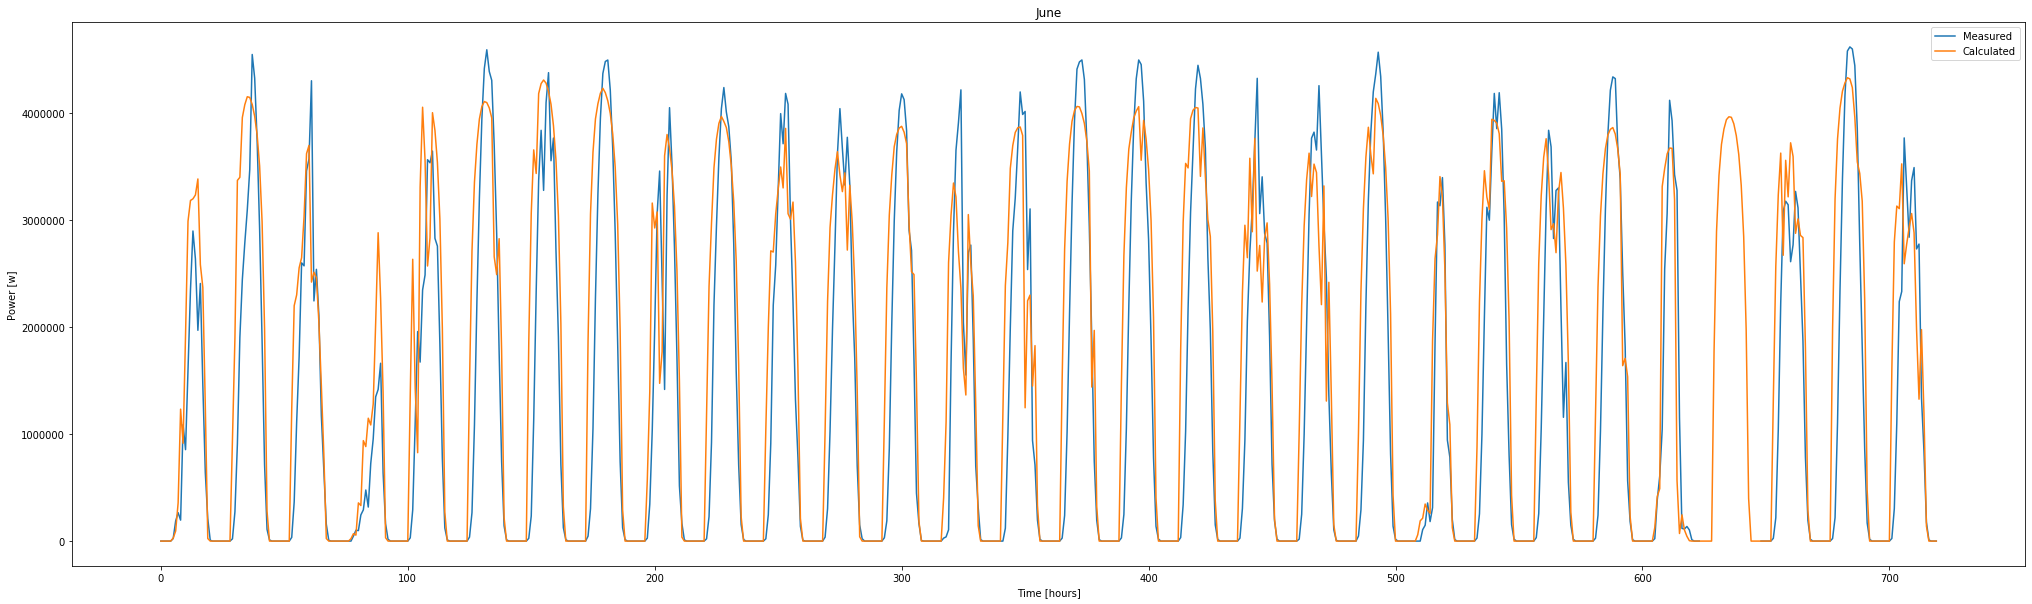

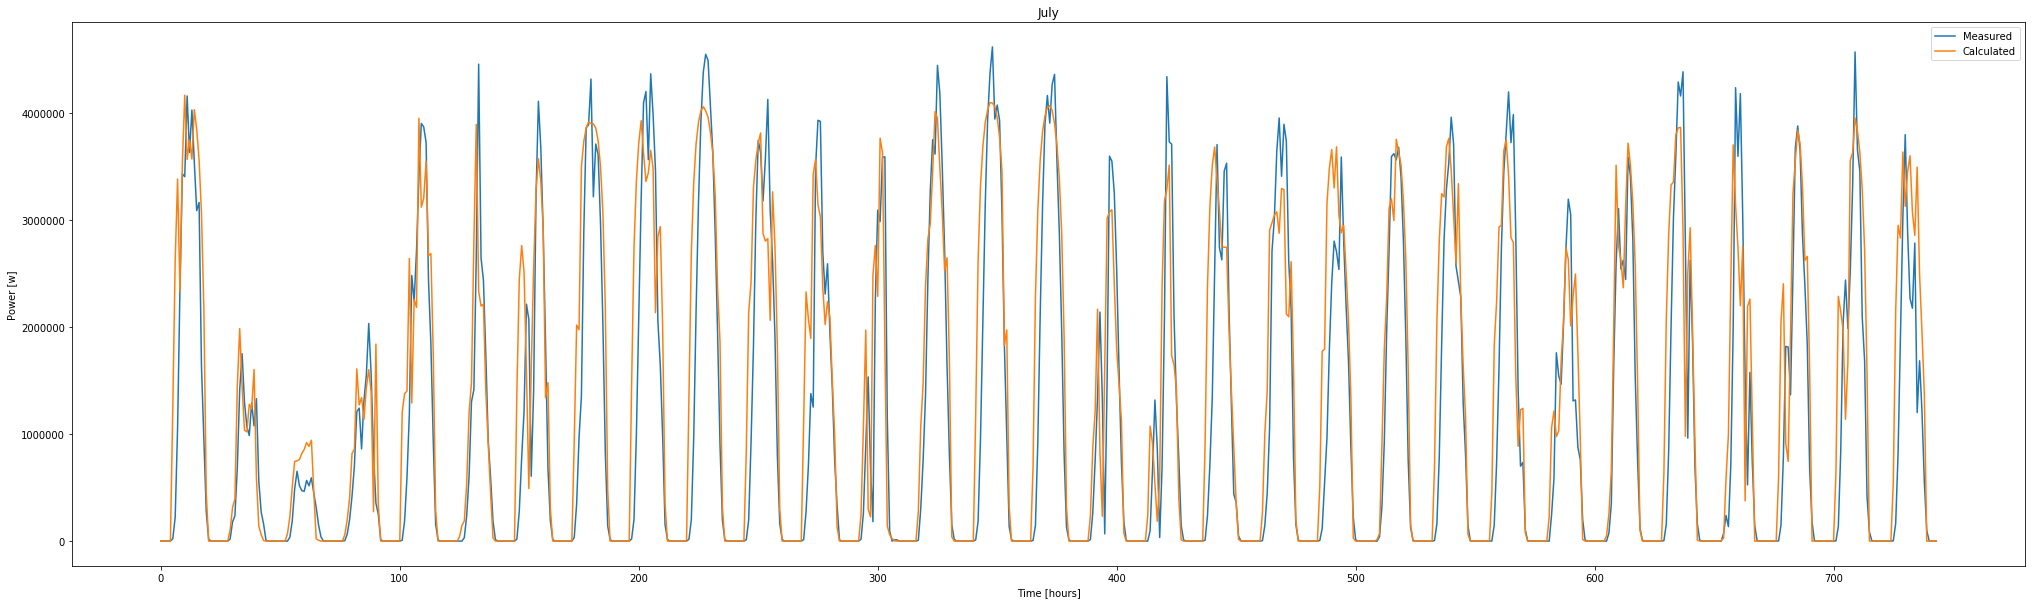

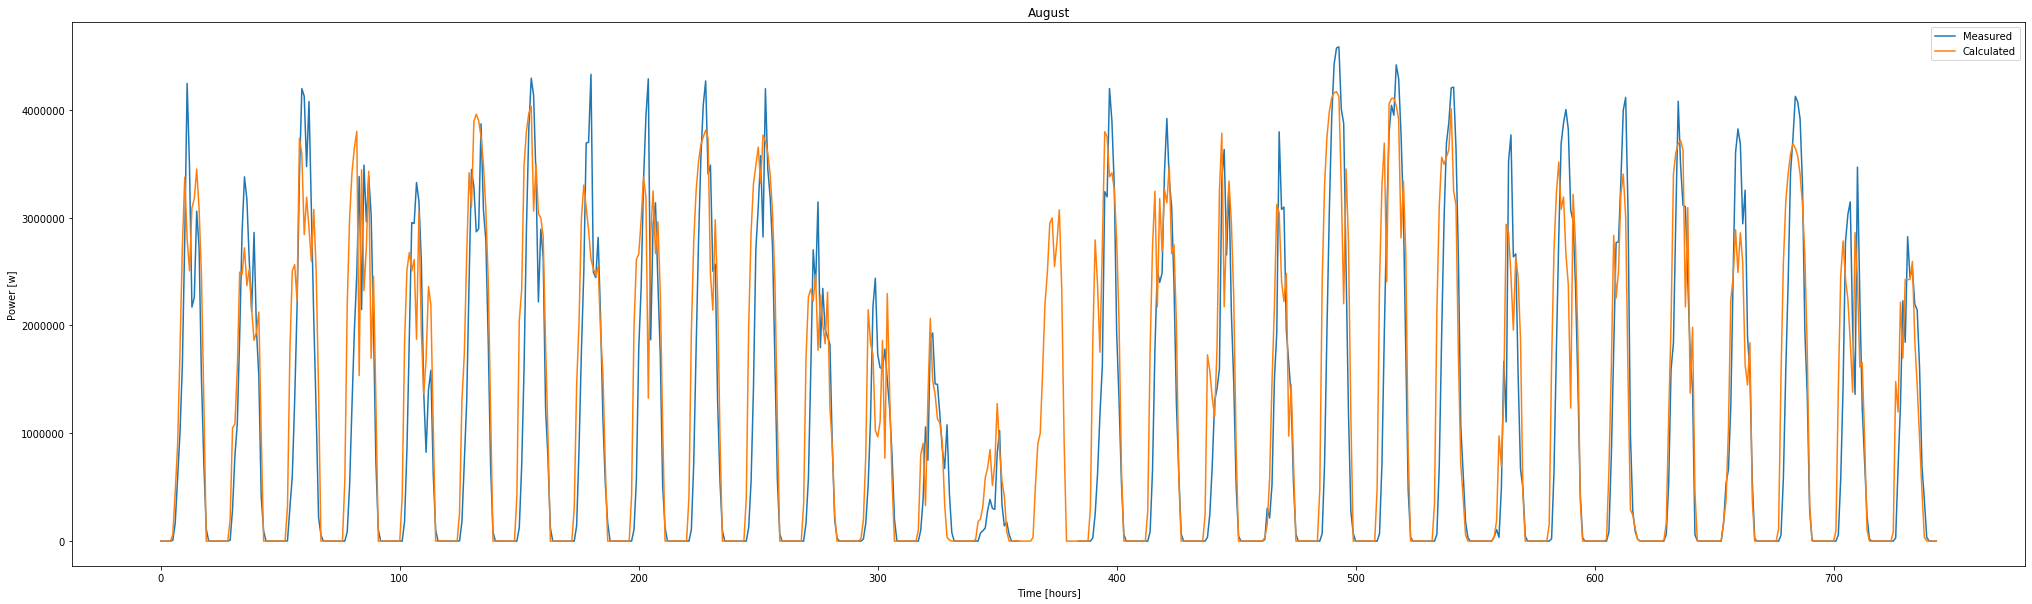

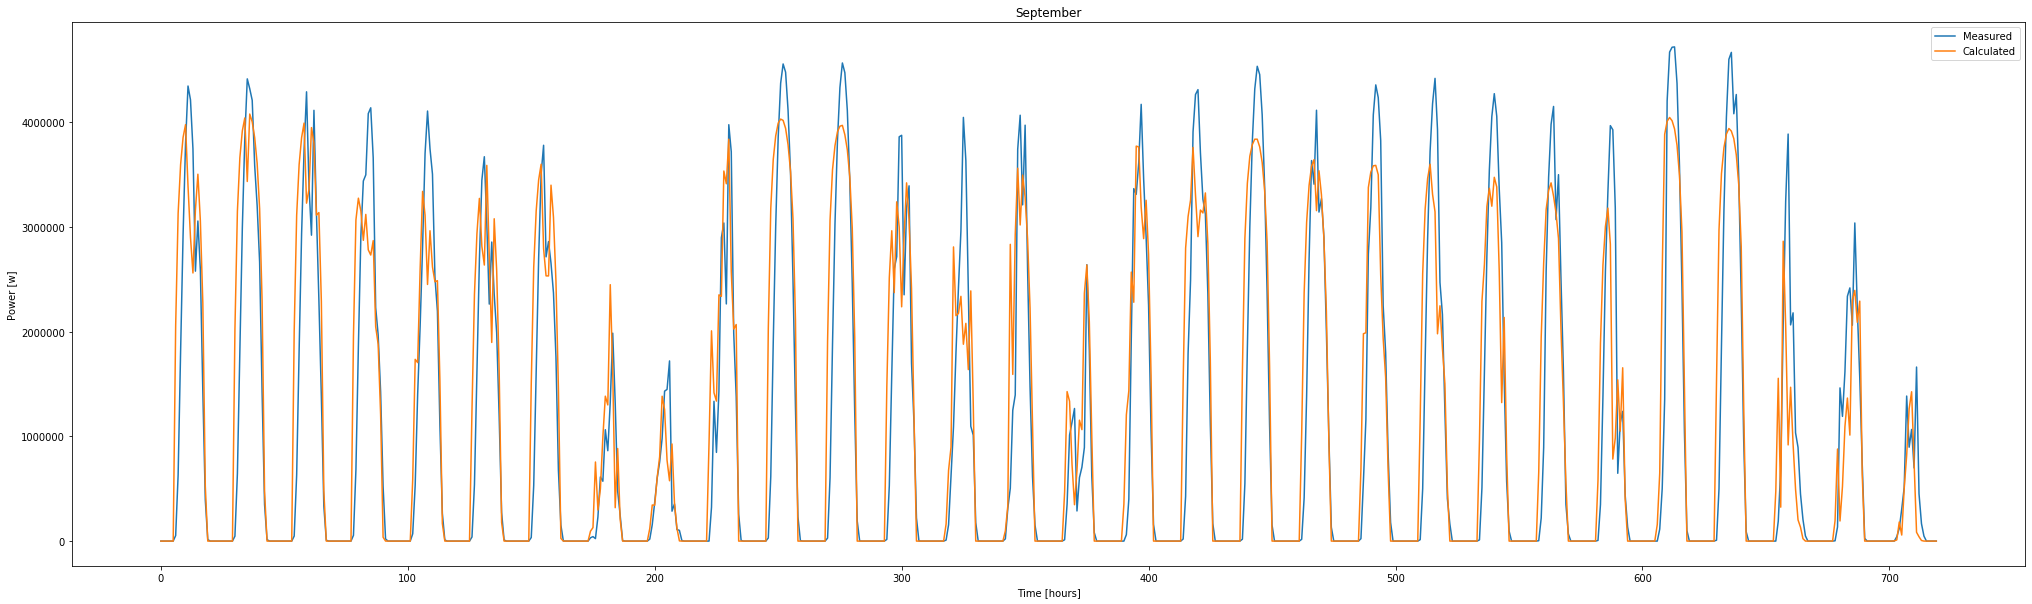

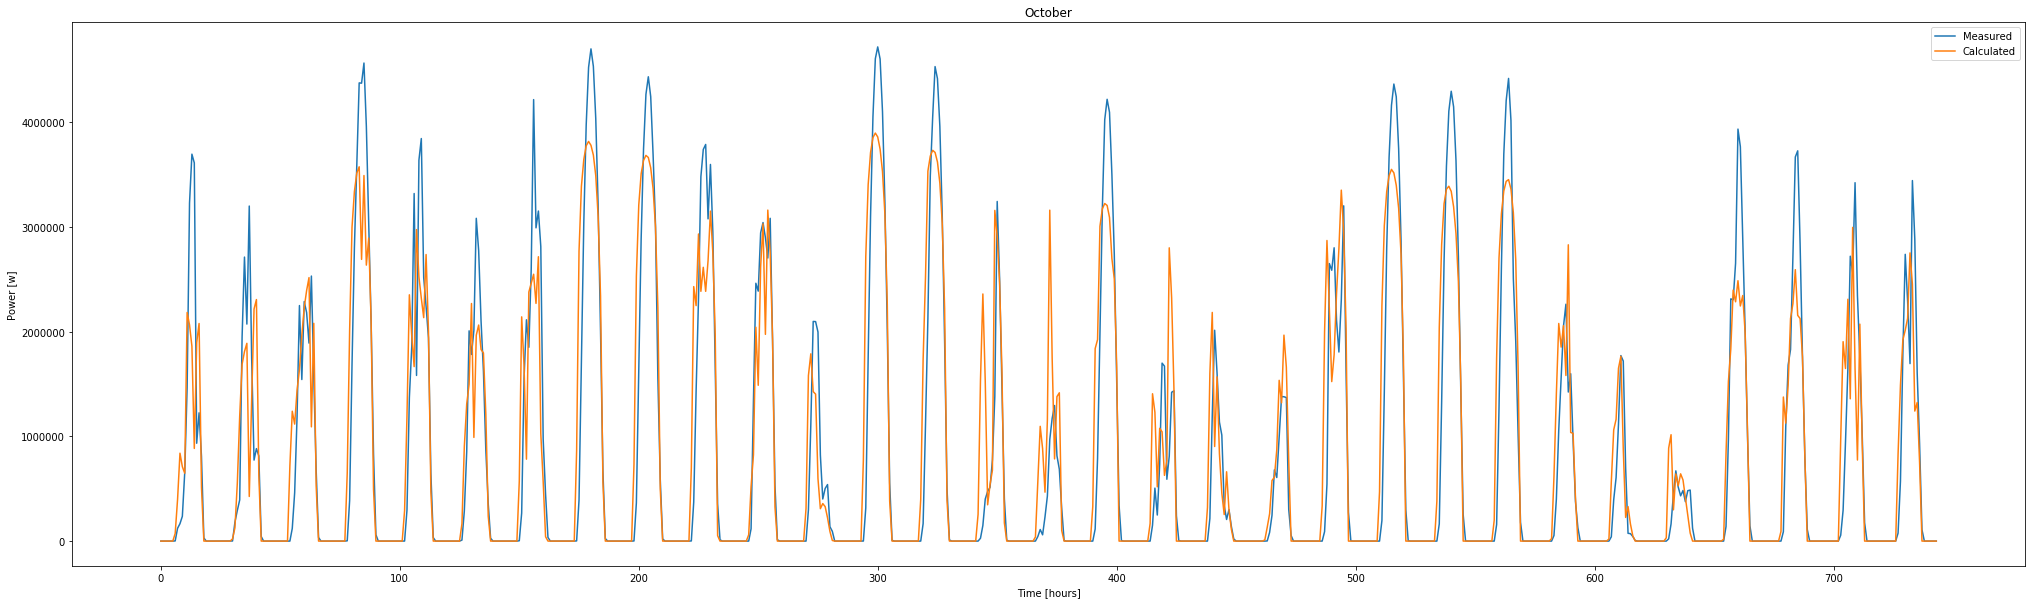

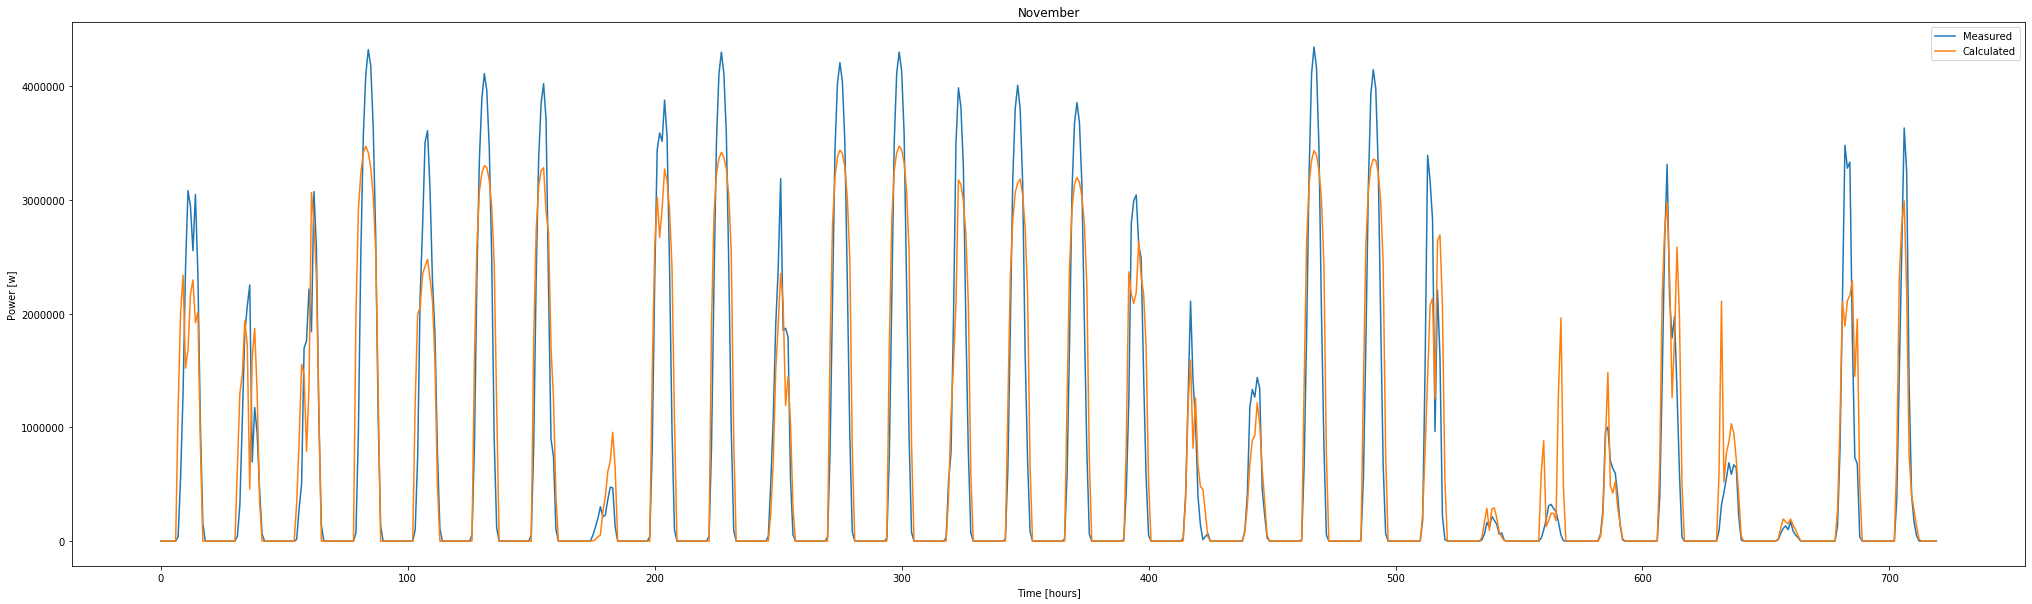

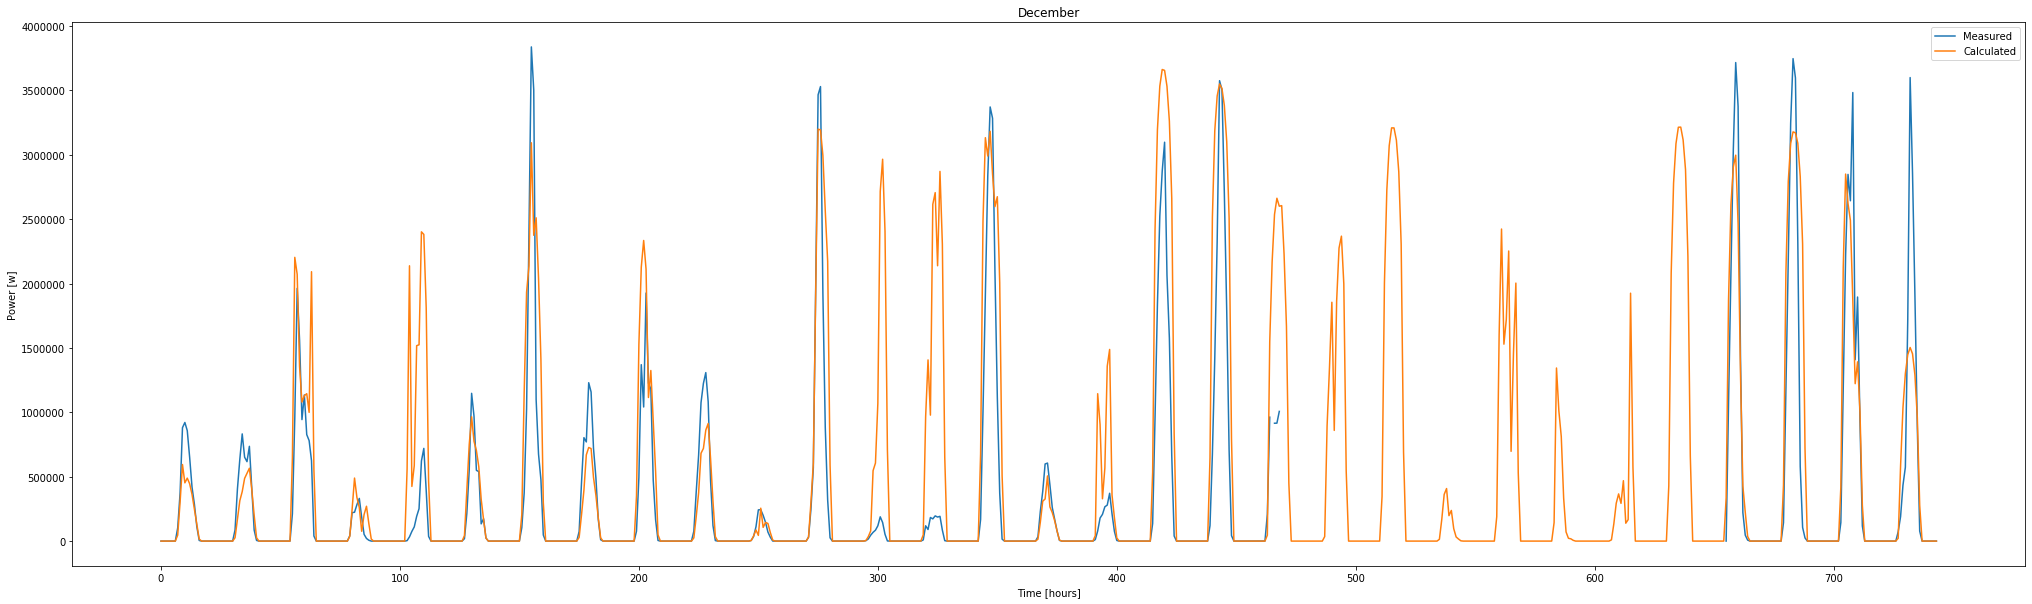

In [0]:
months = calc_grouped.groups.keys()
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August',
              'September', 'October', 'November', 'December']

for month in months:
  actual_month = actual_grouped.get_group(month)
  calc_month = calc_grouped.get_group(month)
  x = np.arange(0,len(actual_month),1)
  fig = plt.figure(figsize=(35,10), edgecolor='k', facecolor='w')
  plt.plot(x,actual_month['inverted'], label='Measured')
  plt.plot(x,calc_month['power_norm'],label='Calculated')
  plt.title(month_list[month-1])
  plt.legend()
  plt.xlabel('Time [hours]')
  plt.ylabel('Power [w]')
  plt.show()

In [0]:
farm_df16['inverted'].mean()

882988.2565952184

In [0]:
df_2016_hourly['power_norm'].mean()

1013943.0235858329